 **Hello!**  Let's get it started.
Import  matplotlib.pyplot, seaborn, and pandas.

In [133]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [134]:
%matplotlib inline

In [135]:
df_taxi = sns.load_dataset('taxis')

In [136]:
display(df_taxi[:3])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [137]:
display(df_taxi.dtypes)

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [138]:
display(df_taxi.shape)

(6433, 14)

Let'check the missed values in the dataset.

In [139]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [140]:
df_taxi[df_taxi.isna().any(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,NaN,Brooklyn,NaN
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,NaN,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,NaN,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,NaN,Queens,NaN


Total cost is one of the most important parameters. Let's check if there are any rows with a zero value in the **"total"** column. Previously, we've found out that there were no rows with unfilled values in this column.

In [141]:
unfilled_rows_count = df_taxi[np.isclose(df_taxi['total'],0.)]

if unfilled_rows_count.shape[0] == 0:
    print(f'Great! There are no rows with zero "total" values.')
else:
    print(f'There are {unfilled_rows_count.shape[0]} rows with zero "total" value. It is needed to provide additional analysis.')


Great! There are no rows with zero "total" values.


The next step is to observe  the **“distance”** column.

In [142]:
unfilled_rows_count = df_taxi[np.isclose(df_taxi['distance'],0.)]

if unfilled_rows_count.shape[0] == 0:
    print(f'Great! There are no rows with zero "distance" values.')
else:
    print(f'There are {unfilled_rows_count.shape[0]} rows with zero "distance" value.')

There are 51 rows with zero "distance" value.


Then I will calculate the duration of the ride for all of those rows. I assume that the distance is zero for canceled rides.

In [143]:
time_delta = unfilled_rows_count.dropoff - unfilled_rows_count.pickup
time_delta

42     0 days 00:00:03
120    0 days 00:00:05
622    0 days 00:00:19
670    0 days 00:00:19
970    0 days 00:00:05
1080   0 days 00:00:08
1207   0 days 00:00:03
1482   0 days 00:01:08
1690   0 days 00:00:00
1910   0 days 00:00:26
1929   0 days 00:00:14
2398   0 days 00:08:58
2742   0 days 00:00:32
3095   0 days 00:00:13
3109   0 days 00:01:38
3221   0 days 00:00:17
3238   0 days 00:00:04
3377   0 days 00:00:35
3644   0 days 00:01:43
3889   0 days 00:00:05
4118   0 days 00:00:05
4264   0 days 00:00:03
4483   0 days 00:00:26
4550   0 days 00:00:06
4663   0 days 00:00:09
4955   0 days 00:25:35
4972   0 days 00:02:20
5433   0 days 00:00:23
5493   0 days 00:00:00
5545   0 days 00:03:35
5546   0 days 00:00:52
5624   0 days 00:00:00
5638   0 days 00:00:00
5678   0 days 00:00:08
5683   0 days 00:01:25
5697   0 days 00:00:04
5721   0 days 00:00:19
5796   0 days 00:00:30
5957   0 days 00:14:15
6080   0 days 00:00:10
6083   0 days 00:00:00
6117   0 days 00:03:57
6118   0 days 00:00:08
6129   0 da

In [144]:
display(df_taxi.iloc[[4955,5957,6393]])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4955,2019-03-23 11:07:11,2019-03-23 11:32:46,1,0.0,19.0,0.0,0.0,22.3,yellow,NaN,West Village,Upper East Side South,Manhattan,Manhattan
5957,2019-03-20 12:02:11,2019-03-20 12:16:26,1,0.0,9.5,0.0,0.0,10.3,green,cash,Steinway,Sunnyside,Queens,Queens
6393,2019-03-10 18:33:13,2019-03-10 19:32:38,1,0.0,71.2,0.0,0.0,72.0,green,credit card,Parkchester,Flatbush/Ditmas Park,Bronx,Brooklyn


The rows with indexes [4955,5957,6393] have fulfilled information in the others columns and I have no idea about the reason why distance is zero in those cases.  Also, I haven't an opportunity to check this cases with colleagues, so I'll drop these 3 rows.

Ok, I suppose I've got enough information to adopt that zero distance and non-zero total mean that the ride has been cancelled and the payment was proceeded according to the conditions of taxi service. 


In [145]:
df_taxi = df_taxi.drop(index = [4955,5957,6393]).reset_index()
del df_taxi['index']
display(df_taxi)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6426,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6427,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6428,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


Let's analyze the information in the **"pickup_zone", "dropoff_zone", "pickup_borough", and "dropoff_borough"** columns.




In [146]:
unfilled_rows_count = df_taxi[
    (df_taxi['dropoff_zone'].isna() |
     df_taxi['dropoff_borough'].isna() |
     df_taxi['pickup_borough'].isna() |
     df_taxi['pickup_zone'].isna())]

print(f'There are {unfilled_rows_count.shape[0]} rows with unfilled information.')

There are 50 rows with unfilled information.


Let's fill in the missing values. Since all columns in the dataset have missing values in rows with string data type, we will fill in the missing values with the string "NA". I'll create a **df_taxi_clean** dataset, which contains the data from **df_taxi** with missing values filled in all columns (where those values are missing) with the value "NA".

In [147]:
df_taxi_clean = df_taxi.fillna('NA')

In [148]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [149]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [150]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

I'm going to provide analysis based only on the day, so let's transform the **pickup** column and retain only information about the day.

In [151]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')
df_taxi_clean['pickup_day']

0      2019-03-23
1      2019-03-04
2      2019-03-27
3      2019-03-10
4      2019-03-30
          ...    
6425   2019-03-31
6426   2019-03-31
6427   2019-03-23
6428   2019-03-04
6429   2019-03-13
Name: pickup_day, Length: 6430, dtype: datetime64[ns]

Then I'll explore payments per day using grouping by the **pickup_day** column. And make a plot.

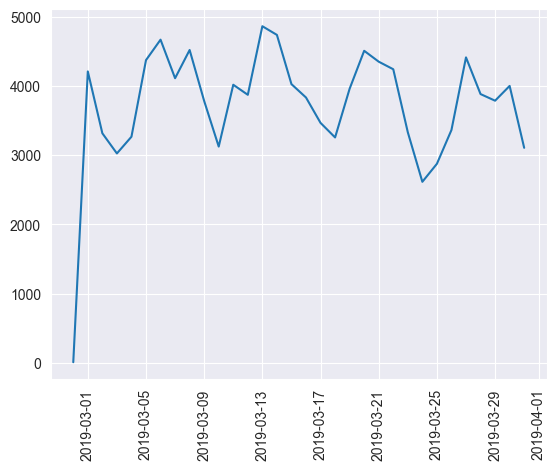

In [152]:
sns.set_style("darkgrid")
plt.plot(df_taxi_clean.sort_values(by =['pickup_day']).groupby(['pickup_day']).total.sum())
plt.xticks(rotation = 90);

The starting point of the plot's line looks unusual. Let's examine the number of rides per day.

In [153]:
df_taxi_clean.sort_values(by =['pickup_day']).groupby(['pickup_day']).total.count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    184
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    232
2019-03-21    221
2019-03-22    229
2019-03-23    208
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

We can see that there is only one row for the date 2019-02-28. This seems to be a record that ended up here accidentally. Let's delete it from the **df_taxi_clean** dataset. Then, let's plot the graph of total payments again.

In [154]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] !='2019-02-28']
df_taxi_clean.sort_values(by =['pickup_day']).groupby(['pickup_day']).total.count()

pickup_day
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    184
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    232
2019-03-21    221
2019-03-22    229
2019-03-23    208
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

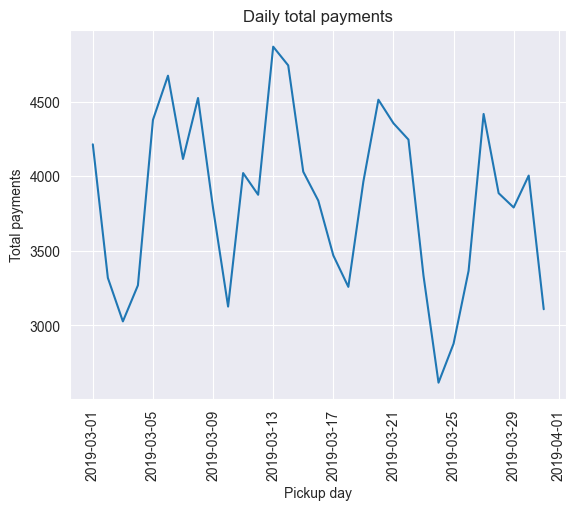

In [155]:
plt.plot(df_taxi_clean.sort_values(by =['pickup_day']).groupby(['pickup_day']).total.sum())

plt.xlabel('Pickup day')
plt.ylabel('Total payments')
plt.title('Daily total payments')
plt.xticks(rotation = 90);


Let's examine the dynamics of total payments by boroughs.

In [156]:
borough_pivot = df_taxi_clean.pivot_table(index = ['pickup_day'],
                                          columns =['pickup_borough'],
                                          values='total', aggfunc= 'sum' )

borough_pivot = borough_pivot.drop(columns = 'NA')

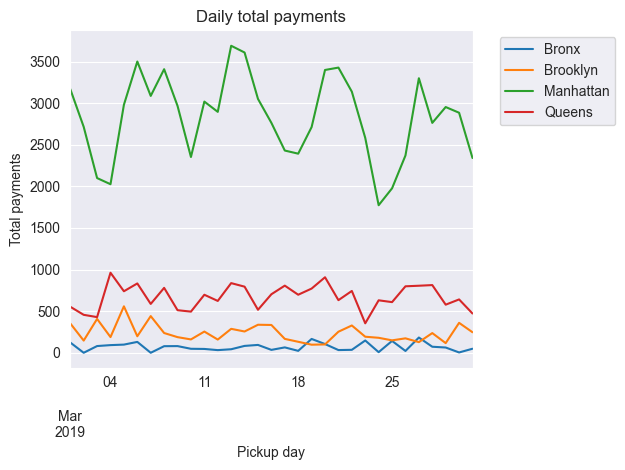

In [157]:
borough_pivot.fillna(0).plot()

plt.xlabel('Pickup day')
plt.ylabel('Total payments')
plt.title('Daily total payments')
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show();

Let's plot the distribution of payment amounts by boroughs.


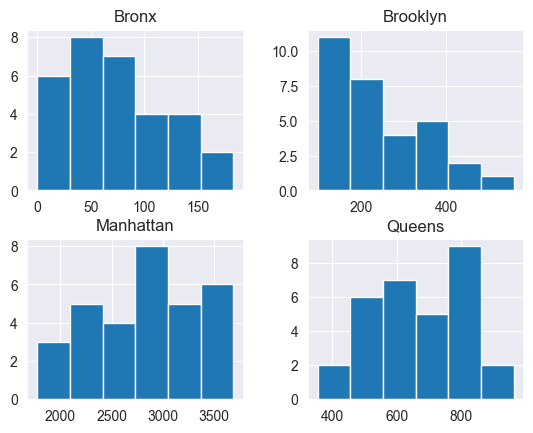

In [158]:
borough_pivot = borough_pivot.fillna(0)
borough_pivot.hist(bins = 6);

In [159]:
display(borough_pivot)

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,0.00,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,0.00,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


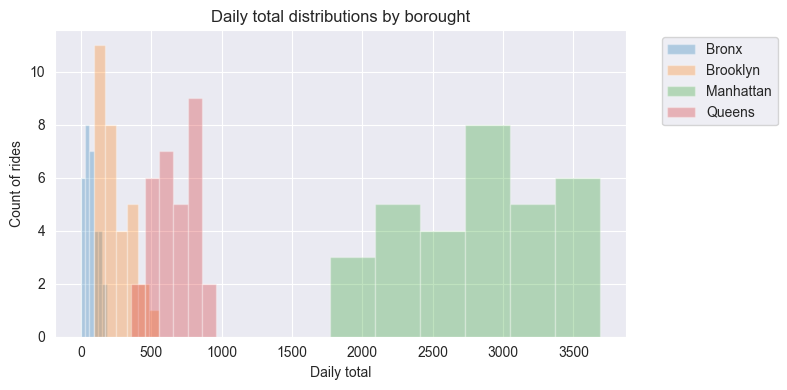

In [160]:
bins = 6
plt.figure(figsize=(8,4))
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.title('Daily total distributions by borought')
plt.grid(True)
for el in borough_pivot.columns:
    plt.hist(borough_pivot[el], bins, alpha = 0.3, label =el);

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

Thus, the plots show us that Manhattan is the borough with the highest daily total payment, while the Bronx has the lowest.

To assess payments based on the type of taxi, we'll examine the distribution of payments using a histogram.

''

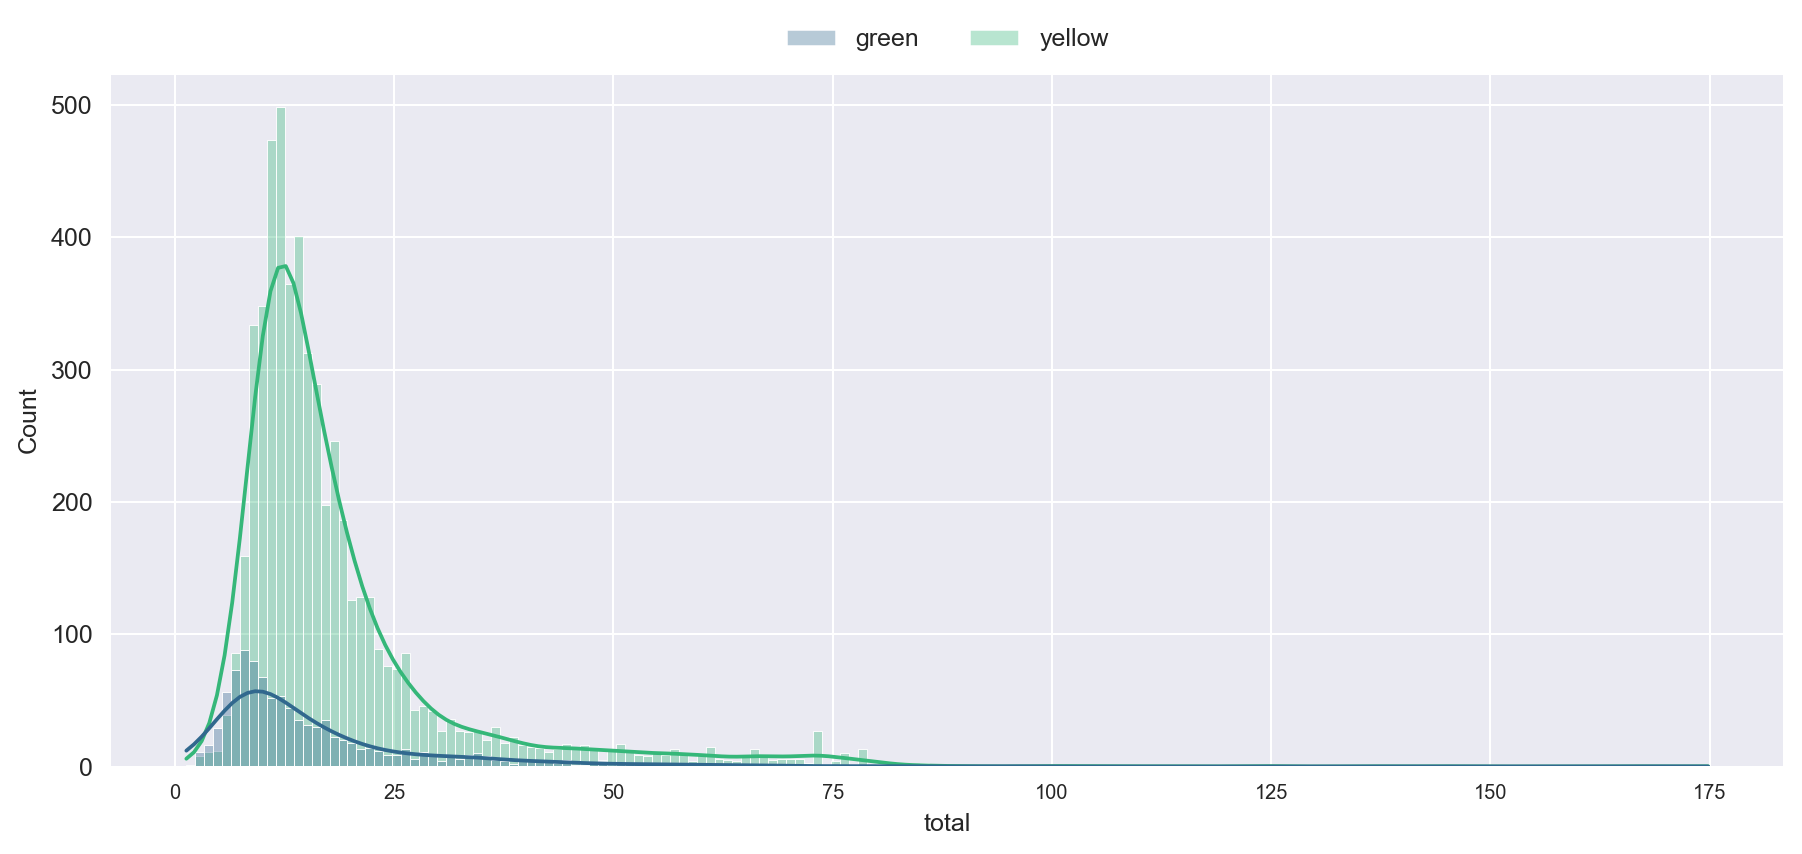

In [161]:
plt.figure(figsize=(12,5),dpi = 180)

g = sns.histplot(
    data=df_taxi_clean.sort_values(by=['color']), x = 'total',
    hue="color", palette='viridis', alpha=0.35,
    kde=True,)

sns.move_legend(
    g, "lower center", bbox_to_anchor=(.5, 1),
    ncol=len(df_taxi_clean['color'].unique()),
    title=None, frameon=False,
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);
;

Thus, on the plot, it is evident that rides taken in yellow taxis have a bigger distribution and a significantly bigger median compared to rides taken in green taxis.

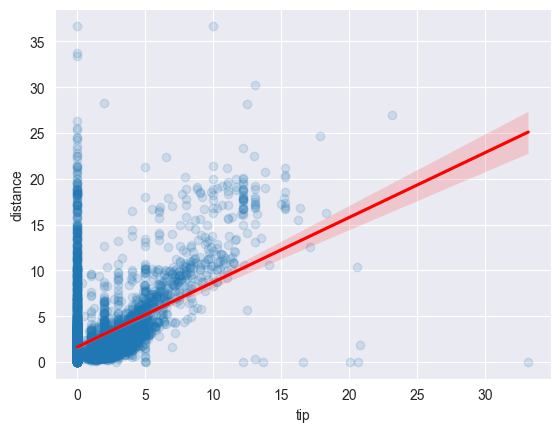

In [162]:
sns.regplot(
    x=df_taxi_clean['tip'], y=df_taxi_clean['distance'],
    scatter_kws={'alpha':0.15}, line_kws={'color':'r'},
);

I've just constructed a scatter plot for **distance** and **tip** values. For instance, it shows that tips are not guaranteed, and for any distance, there is a probability that the driver may not receive any tip. 

Next, I'll analyze the dynamics and statistical values of tips for each borough.

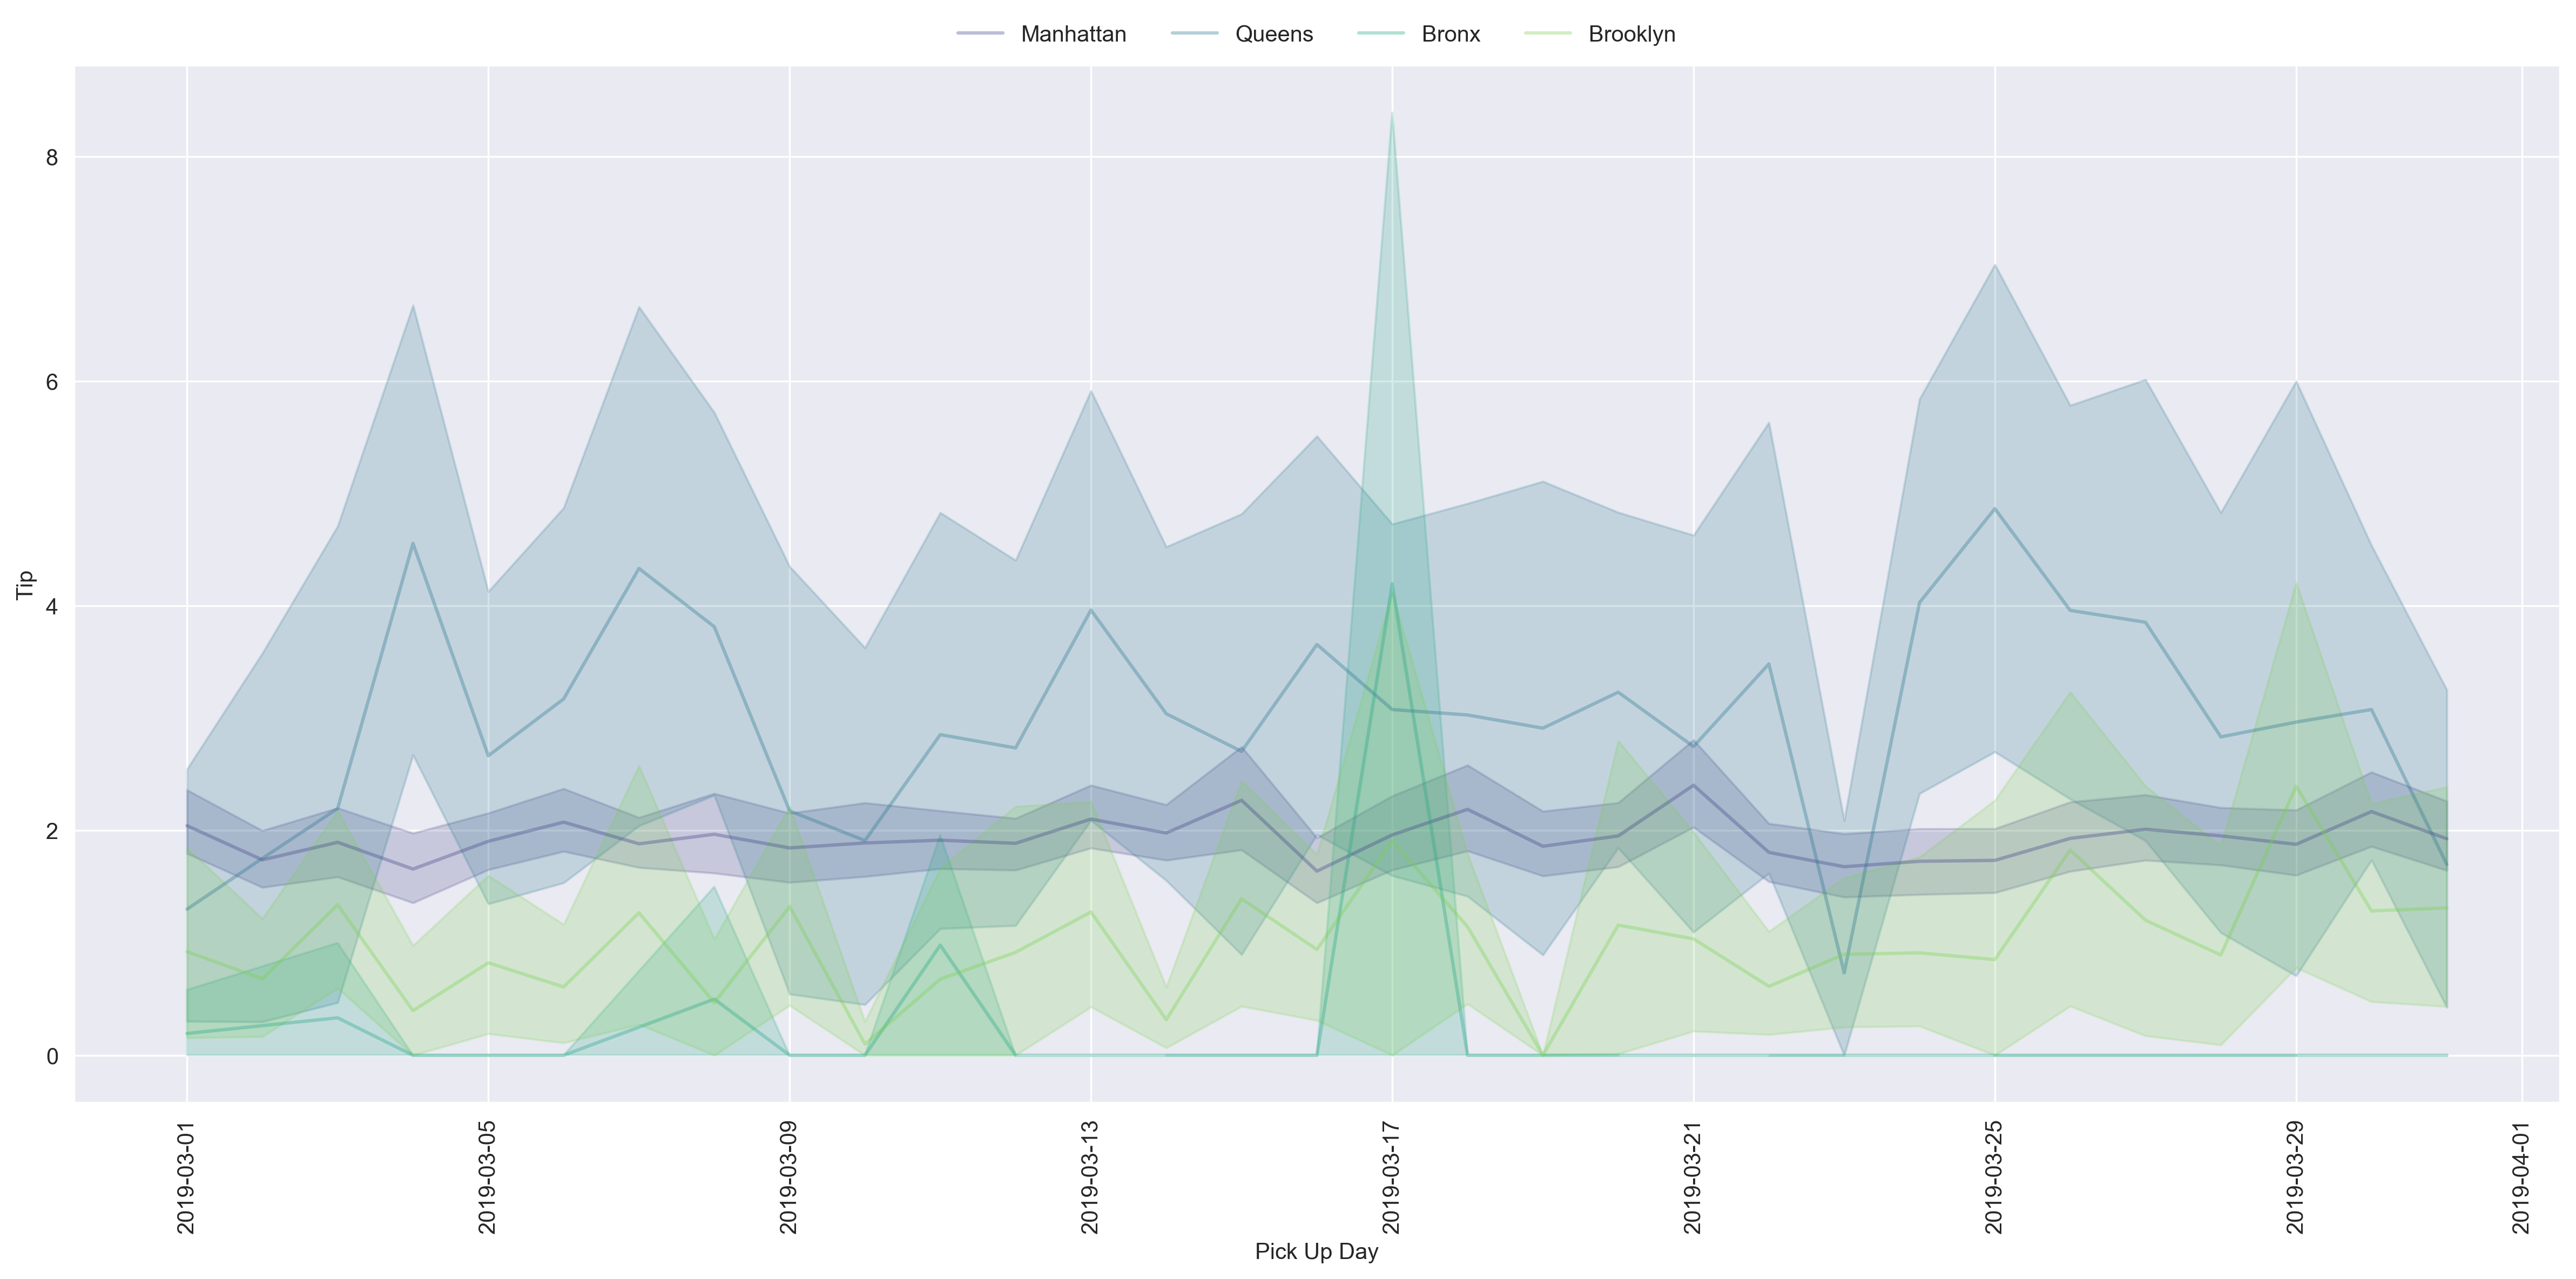

In [163]:
plt.figure(figsize=(16,8),dpi = 300)

g = sns.lineplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], 
             x='pickup_day', y='tip', 
             hue='pickup_borough',
             palette='viridis', alpha=0.35,)

sns.move_legend(
    g, "lower center", bbox_to_anchor=(.5, 1),
    ncol=len(df_taxi_clean['pickup_borough'].unique()),
    title=None, frameon=False,
)


plt.xlabel('Pick Up Day')
plt.ylabel('Tip')
plt.xticks(rotation = 90);
plt.tight_layout()
plt.show();

In [164]:
df_taxi_clean.groupby(['pickup_borough']).tip.describe()

,count,mean,std,min,25%,50%,75%,max
pickup_borough,,,,,,,,
Bronx,98.0,0.150102,0.901747,0.0,0.0,0.000,0.000,8.39
Brooklyn,383.0,0.966345,1.667210,0.0,0.0,0.000,1.655,7.70
Manhattan,5267.0,1.939918,2.023970,0.0,0.0,1.860,2.800,20.56
NA,26.0,5.101154,8.231736,0.0,0.0,1.725,5.045,33.20
Queens,655.0,3.049344,4.355732,0.0,0.0,0.000,5.975,23.19


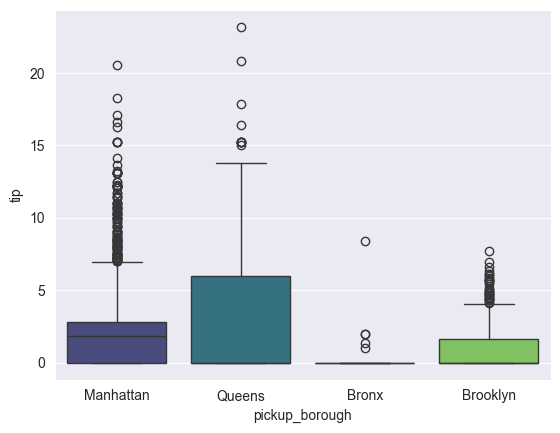

In [165]:
plt.figure(dpi=100)
sns.set_style("darkgrid")

sns.boxplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], 
             x='pickup_borough', y='tip',
            hue='pickup_borough', palette='viridis',
           );

The analysis provided above indicates that there is insufficient data in the **Bronx**. There are much periods with zero value of tips. Further research should be provided to determine the reason of this. As for **Manhattan**, the 75% of tips are fairly concentrated around the mean value. Moreover, the data dispersion is not significant. In the **Queens** area, the variance of tips is quite significant. Therefore, I would recommend providing an exploration to identify the factors influenced on tip value.

Let's see how the payment method affects the tip amount.

In [166]:
df_taxi_clean.groupby(['payment']).tip.describe()

,count,mean,std,min,25%,50%,75%,max
payment,,,,,,,,
NA,43.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
cash,1810.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
credit card,4576.0,2.782413,2.488715,0.0,1.5,2.2,3.26,33.2


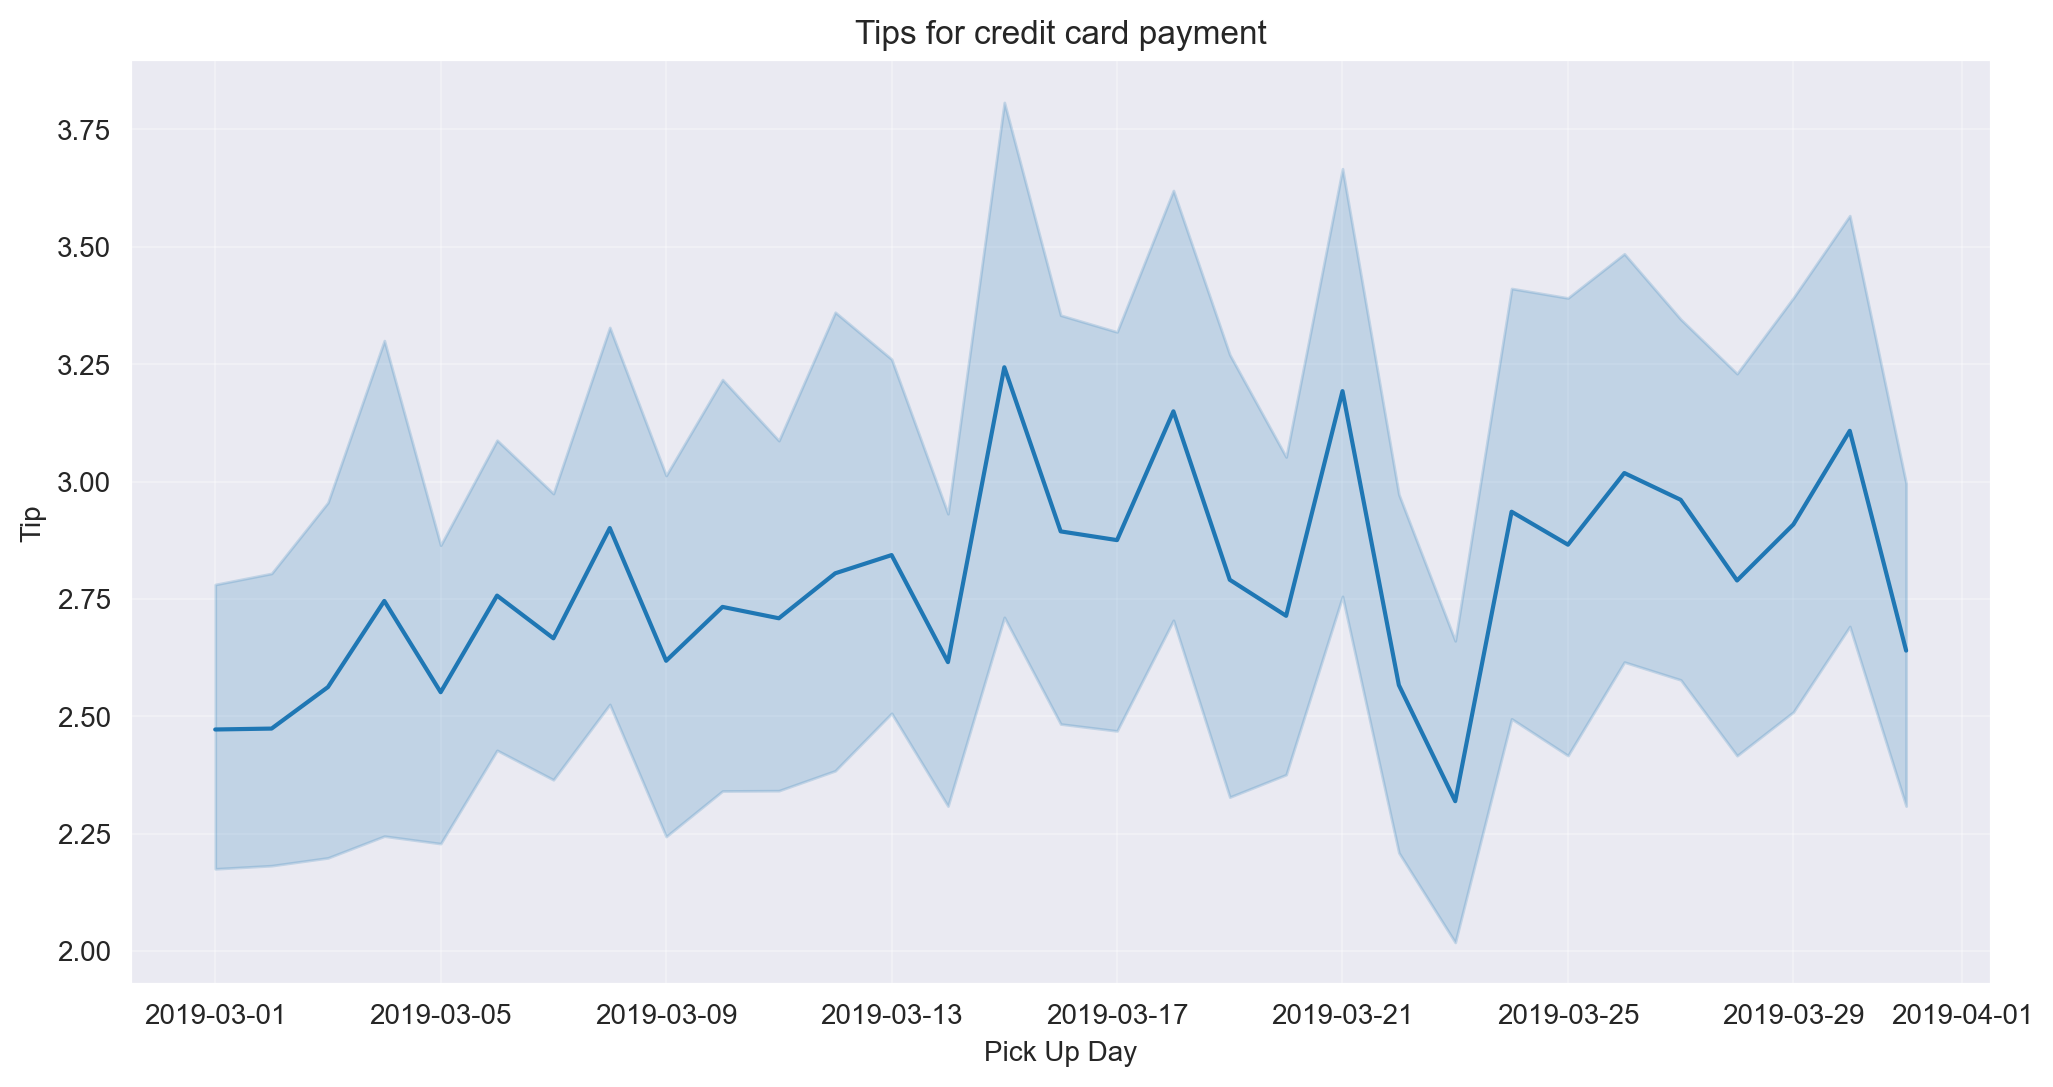

In [167]:
plt.figure(figsize=(12,6), dpi=200)


g = sns.lineplot(data=df_taxi_clean[df_taxi_clean.payment == 'credit card'], 
             x='pickup_day', 
             y='tip', legend = True,
                
)

plt.title("Tips for credit card payment", fontsize=12)
plt.xlabel('Pick Up Day')
plt.ylabel('Tip')

plt.grid(axis='both', alpha=.3) 
plt.show()

I've got that tips are only left by customers who pay by credit card. Let's then analyze the tip amount based on the type of taxi: yellow or green.

In [168]:
df_taxi_clean[df_taxi_clean['payment']=='credit card'].groupby(['color']).tip.describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
green,576.0,1.356146,1.755880,0.0,0.0,1.00,2.0525,10.71
yellow,4000.0,2.987795,2.511437,0.0,1.7,2.35,3.4500,33.20


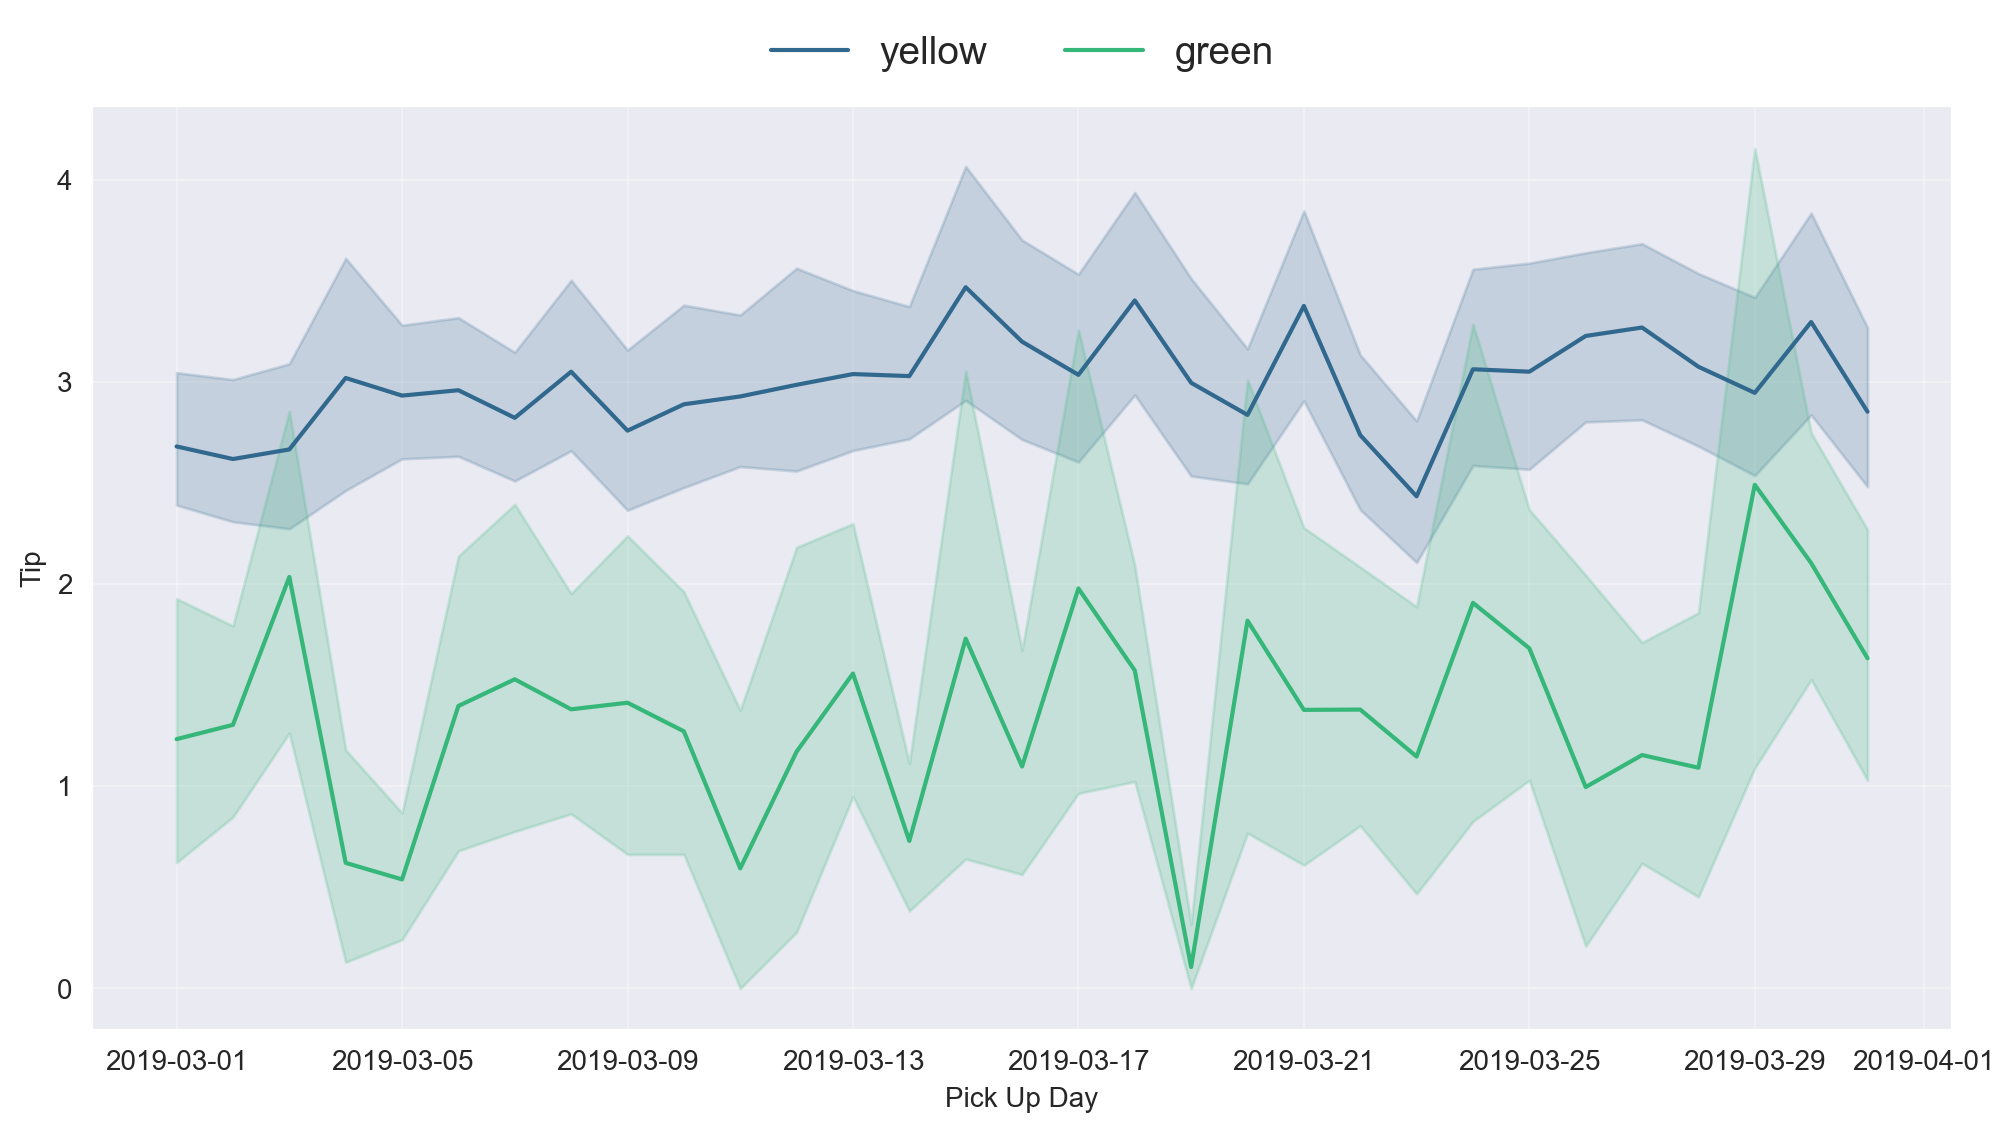

In [169]:
plt.figure(figsize=(12,6), dpi=200)

g = sns.lineplot(
    data=df_taxi_clean[df_taxi_clean['payment']=='credit card'],
    x='pickup_day', y='tip', hue='color',
    palette='viridis',
)

sns.move_legend(
    g, 'lower center', bbox_to_anchor=(.5, 1),
    ncol=len(df_taxi_clean['color'].unique()),
    title=None, frameon=False, fontsize="14"
)

#plt.title("TIPS", fontsize=22)
plt.xlabel('Pick Up Day')
plt.ylabel('Tip')

plt.grid(axis='both', alpha=.3) 
plt.show()

As expected, I've found out that the tip amount in the **yellow** cubs significantly exceeds the tip amount in the green. It is because the dataset is mainly consisting of **Manhattan** rides, where yellow taxis are dominated. Since they are providing full service, it's also reasonable to expect that the tips, as a payment for service, would be higher.

I will analyze the total daily payments based on both day of the week and pickup borough. 

In [170]:
df_taxi_clean['weekday'] =df_taxi_clean['pickup_day'].dt.dayofweek


In [171]:
borough_pivot = df_taxi_clean.pivot_table (index='weekday',
                                          columns='pickup_borough',
                                          values='total',
                                          aggfunc='sum')
borough_pivot = borough_pivot.drop(columns ='NA')

In [172]:

df_weekday = pd.DataFrame(
    index = ['Monday','Tuesday','Wednesday','Thusday','Friday','Saturday','Sunday'],
    data =borough_pivot.values, 
    columns =list(borough_pivot.columns))
display(df_weekday)

,Bronx,Brooklyn,Manhattan,Queens
Monday,303.61,724.99,9416.01,2966.40
Tuesday,318.07,987.70,10962.30,2933.46
Wednesday,461.26,714.40,13891.55,3384.28
Thusday,187.62,1186.42,12888.98,2827.99
Friday,395.65,1371.47,15722.56,3172.06
Saturday,266.45,1221.30,13916.63,2666.85
Sunday,249.10,1161.20,10999.90,2833.05


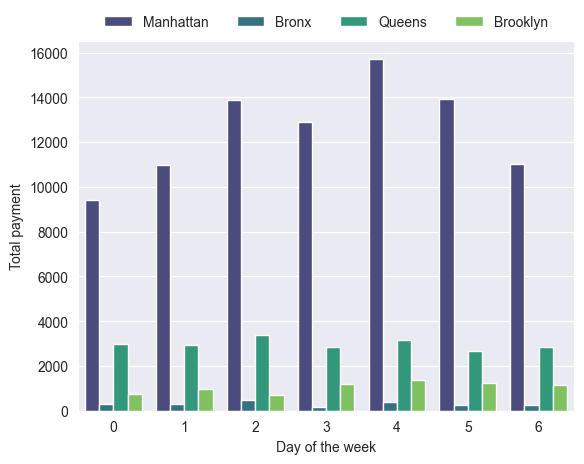

In [173]:
plt.figure(dpi=100)

g = sns.barplot(
    data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'],
    x='weekday', y='total',  estimator='sum',
    hue='pickup_borough', errorbar=None,
    palette='viridis',
)

sns.move_legend(
    g, 'lower center', bbox_to_anchor=(.5, 1),
    ncol=len(df_taxi_clean['pickup_borough'].unique()),
    title=None, frameon=False,
)

plt.xlabel('Day of the week')
plt.ylabel('Total payment');

I've generated a pivot table and visualized the data. In general, fluctuations in daily total payments are noticeable only in the **Manhattan** region. Fridays see the highest volume of rides (presumably due to office workers rushing to bars or heading home), while ride counts sharply drop on Sundays. I would suggest taxi companies increase their fleet on Fridays to improve service, considering our earlier findings indicating **Manhattan** as the area with the highest totals and tips - where our best clients are. Additionally, some efforts should be made to encourage clients to use taxis on Sundays and Mondays. 

Demand of cars is balanced throughout the week in other borough.

Now, let's attempt to analyze how the day of the week, distance, number of passengers, total payment and tips influence each other. To do this, I'll calculate the correlation between these variables and provide a heatmap matrix.

In [174]:
corr_data = df_taxi_clean[['weekday','total','tip','distance','passengers']].copy()
corr_data.corr()

,weekday,total,tip,distance,passengers
weekday,1.000000,-0.036855,-0.025300,-0.018283,0.018982
total,-0.036855,1.000000,0.647468,0.906332,0.015915
tip,-0.025300,0.647468,1.000000,0.452389,0.020880
distance,-0.018283,0.906332,0.452389,1.000000,0.009209
passengers,0.018982,0.015915,0.020880,0.009209,1.000000


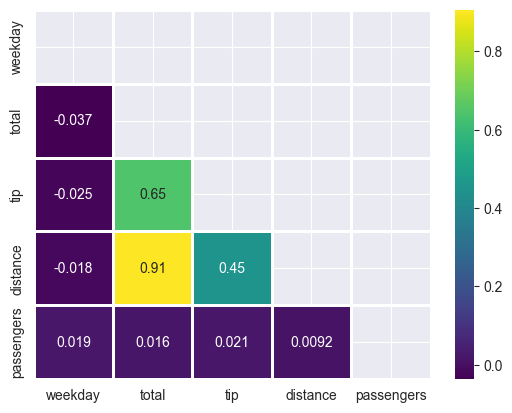

In [175]:
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="viridis");

Unfortunately, a strong correlation between the specified parameters was not found. However, I do notice a relationship between distance and total payment, which is logical and reasonable. Additionally, there appears to be a slight trend of rides increasing with the distance of the ride.

Implementing activities to improve passenger comfort on long rides could further enhance customer loyalty. This would also demonstrate the company's loyalty to customers.